<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%83%9D%ED%99%9C%EC%84%9C%EB%B9%84%EC%8A%A4%5B%ED%8A%B9%EC%88%98%EA%B5%90%ED%86%B5%5D_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
sh = pd.read_csv('신한카드_업종대분류 전처리완료.csv', index_col=0, encoding='utf-8')

In [ ]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [ ]:
sh['업종대분류'].unique()

array(['문화레져', '생활서비스', '음식', '일반유통', '전문서비스', '종합유통', '기타'], dtype=object)

### 카테고리 재분류 필요성
- 따라서 **데이터의 카테고리 재분류가 필요**할 수 있다.
- 개인교통: 교통관련 카테고리인 연료, 자동차정비, 자동차-기타, 수리점
- 일반교통: 대중교통, 택시, 터널/유료도로/하이패스
- 특수교통: 항공, 철도, 화물운송업, 여객선
- 월납/세금: 월납/세금
- 그 외 서비스: 사회단체, 세탁소, 사진, 농기구, 기계/장비 대여, 열쇠/도장 등

In [ ]:
sh = sh[sh['업종대분류'].str.contains('생활서비스')]

In [ ]:
sh['업종중분류'].unique()

array(['기계/장비 대여', '농기구', '대중교통', '미용/사우나/마사지', '사진', '사회단체', '세탁소',
       '수리점', '여객선', '연료', '열쇠/도장', '월납/세금', '자동차-기타', '자동차정비', '철도',
       '택시', '항공', '화물운송업', '터널/유료도로/하이패스'], dtype=object)

In [ ]:
personal_transport = sh[sh['업종중분류'].str.contains('연료|자동차-기타|자동차정비|수리점')]
public_transport = sh[sh['업종중분류'].str.contains('대중교통|택시|터널/유료도로|하이패스')]
special_transport = sh[sh['업종중분류'].str.contains('항공|철도|화물운송업|여객선')]
etc = sh[sh['업종중분류'].str.contains('사회단체|세탁소|사진|농기구|기계/장비 대여|열쇠/도장')]
tax = sh[sh['업종중분류'].str.contains('월납/세금')]

In [ ]:
sh = special_transport

In [ ]:
sh['업종소분류'].unique()

array(['여객선', '철도', '항공사', '종합이삿짐대행', '콜밴', '퀵배달', '택배업', '화물운송'],
      dtype=object)

In [ ]:
sh

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
92,201903,강원,생활서비스,여객선,여객선,0,0,3,87907000,2740,29302467,32083
111,201903,강원,생활서비스,철도,철도,0,0,1,1823000,37,1823000,49270
113,201903,강원,생활서비스,항공,항공사,0,0,0,0,0,0,0
114,201903,강원,생활서비스,화물운송업,종합이삿짐대행,0,0,6,6465000,6,1077500,1077500
115,201903,강원,생활서비스,화물운송업,콜밴,4,0,16,821000,66,51305,12438
...,...,...,...,...,...,...,...,...,...,...,...,...
23667,202009,충북,생활서비스,화물운송업,종합이삿짐대행,0,0,4,7695000,34,1923850,226335
23668,202009,충북,생활서비스,화물운송업,콜밴,0,1,12,1562000,38,130167,41105
23669,202009,충북,생활서비스,화물운송업,퀵배달,0,0,3,294000,6,98000,49000
23670,202009,충북,생활서비스,화물운송업,택배업,0,0,86,188515000,5400,2192030,34910


In [ ]:
group = sh.groupby(by='업종소분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,여객선,8,1,260,4858047000,123243,1249634577,2485525
1,종합이삿짐대행,3,21,493,689490000,1626,88794131,47216593
2,철도,0,0,22,73303103000,2804942,27312328968,293934
3,콜밴,35,16,916,152823000,2482,10199738,5961504
4,퀵배달,12,10,144,127388000,3815,32142803,4428955
5,택배업,21,29,5482,8446327000,318990,155138454,2205359
6,항공사,0,4,422,195530789000,831898,8203008055,3077049
7,화물운송,714,249,6961,18072442000,987015,138779440,10030749


In [ ]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [ ]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [ ]:
vcols = ['매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액']

In [ ]:
# 표준화 수행
cls = group[vcols]
cols = cls.columns
scaler = StandardScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[-0.61377604, -0.51295472, -0.56986982, -0.42127207, -0.50147166],
       [-0.52312005, -0.57816709, -0.7054955 , -0.43714135,  2.30892296],
       [-0.70637743,  0.5577908 ,  2.42072564,  2.62041371, -0.59854383],
       [-0.35853858, -0.58656263, -0.7045409 , -0.43827211, -0.33959459],
       [-0.65890949, -0.58696054, -0.70305436, -0.43761315, -0.54551034],
       [ 1.41800746, -0.45682014, -0.35157534, -0.43701083, -0.59602295],
       [-0.55074484,  2.46990477,  0.22041292, -0.01306234,  0.92792611],
       [ 1.99345897, -0.30623045,  0.39339736, -0.43604185, -0.65570571]])

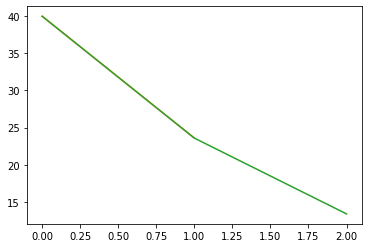

In [ ]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 4):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [ ]:
# cluster 수는 2개로 결정
km = KMeans(n_clusters=3)
km.fit(scaled)
km.cluster_centers_

array([[ 0.20952038, -0.50461593, -0.44018976, -0.43455856, -0.05489705],
       [-0.70637743,  0.5577908 ,  2.42072564,  2.62041371, -0.59854383],
       [-0.55074484,  2.46990477,  0.22041292, -0.01306234,  0.92792611]])

In [ ]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.209520,-0.504616,-0.440190,-0.434559,-0.054897
1,-0.706377,0.557791,2.420726,2.620414,-0.598544
2,-0.550745,2.469905,0.220413,-0.013062,0.927926


In [ ]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['클러스터']
predict

,클러스터
0,0
1,0
2,1
3,0
4,0
5,0
6,2
7,0


In [ ]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.613776,-0.512955,-0.569870,-0.421272,-0.501472
1,-0.523120,-0.578167,-0.705495,-0.437141,2.308923
2,-0.706377,0.557791,2.420726,2.620414,-0.598544
3,-0.358539,-0.586563,-0.704541,-0.438272,-0.339595
4,-0.658909,-0.586961,-0.703054,-0.437613,-0.545510
5,1.418007,-0.456820,-0.351575,-0.437011,-0.596023
6,-0.550745,2.469905,0.220413,-0.013062,0.927926
7,1.993459,-0.306230,0.393397,-0.436042,-0.655706


In [ ]:
names = pd.DataFrame(group['업종소분류'])
names.reset_index(inplace=True, drop=True)
names

,업종소분류
0,여객선
1,종합이삿짐대행
2,철도
3,콜밴
4,퀵배달
5,택배업
6,항공사
7,화물운송


In [ ]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종소분류,클러스터
0,-0.613776,-0.512955,-0.569870,-0.421272,-0.501472,여객선,0
1,-0.523120,-0.578167,-0.705495,-0.437141,2.308923,종합이삿짐대행,0
2,-0.706377,0.557791,2.420726,2.620414,-0.598544,철도,1
3,-0.358539,-0.586563,-0.704541,-0.438272,-0.339595,콜밴,0
4,-0.658909,-0.586961,-0.703054,-0.437613,-0.545510,퀵배달,0
5,1.418007,-0.456820,-0.351575,-0.437011,-0.596023,택배업,0
6,-0.550745,2.469905,0.220413,-0.013062,0.927926,항공사,2
7,1.993459,-0.306230,0.393397,-0.436042,-0.655706,화물운송,0


In [ ]:
# cluster labeling
# 0번 클러스터는 가맹점수, 매출건수가 크지만 건당,점당매출은 작은 편의점 같은 산업들이 해당된다.
# 1번 클러스터는 가맹점수, 매출건수는 작지만 건당,점당매출이 큰 유통, 전문서비스 등 음식을 제외한 산업이 해당된다.
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.209520,-0.504616,-0.440190,-0.434559,-0.054897
1,-0.706377,0.557791,2.420726,2.620414,-0.598544
2,-0.550745,2.469905,0.220413,-0.013062,0.927926


In [ ]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green', 'orange']

  target = result[result['업종소분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='Cluster0',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='Cluster1',
      line_color=color[1]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[2],
      theta = categories,
      fill='toself',
      name='Cluster2',
      line_color=color[2]
  ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  # fig.add_trace(go.Scatterpolar(
  #     r = cluster.values[3],
  #     theta = categories,
  #     fill='toself',
  #     name='Cluster3',
  #     line_color=color[3]
  # ))

  # fig.add_trace(go.Scatterpolar(
  #     r = target.values[0],
  #     theta = categories,
  #     fill='toself',
  #     name=name,
  #     line_color=color[4]
  # ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['클러스터']),
        visible=True,
      )),
  )
  print(name, target['클러스터'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
# show_cluster(result, '편의점')

In [ ]:
# StandardScaler, MinMaxScaler 사용 시 Outlier에 굉장히 민감함.
for col in sh['업종소분류'].unique():
  show_cluster(result, col)

여객선 0    0
Name: 클러스터, dtype: int32


철도 2    1
Name: 클러스터, dtype: int32


항공사 6    2
Name: 클러스터, dtype: int32


종합이삿짐대행 1    0
Name: 클러스터, dtype: int32


콜밴 3    0
Name: 클러스터, dtype: int32


퀵배달 4    0
Name: 클러스터, dtype: int32


택배업 5    0
Name: 클러스터, dtype: int32


화물운송 7    0
Name: 클러스터, dtype: int32


### 결과
1. 여객선, 콜백, 퀵배달 은 공통된 특징을 갖고 같은 클러스터로 분류됨
2. 철도/항공사/종합이삿짐대행 서비스는 각각 개별분류
3. 택배업과 화물운송 분류는 유사한 특징을 갖고 같은 클러스터로 분류됨